## Introduction

This example demonstrates how to use the `CoronalLoopBuilder` to generate and visualize coronal loops
on solar images viewed from different observers. The `CoronalLoopBuilder` allows users to interactively adjust parameters
to customize the appearance of the coronal loops.

This example uses two dummy solar images. You can replace the dummy maps with any real solar images observed from different instruments. The number of instruments is not limited to one or two. For instance, if you provide a SDO/AIA map
and a SOLO/STIX map, the code will visualize the loop from both viewing perspectives. The dummy maps
here are just placeholders to demonstrate the functionality.

Steps:
1. Load solar images or create dummy ones with metadata.
2. Visualize the solar images.
3. Initialize the `CoronalLoopBuilder` with the solar images.
4. Interactively adjust the coronal loop parameters using sliders.

Let's get started!

In [7]:
# Import necessary libraries
from sunpy import map as smap
from astropy.time import Time
from sunpy.util import MetaDict
import numpy as np
import astropy.constants as const
import astropy.units as u
%matplotlib widget
import matplotlib.pyplot as plt
from coronalloopcore.builder import CoronalLoopBuilder



## Step 1: Load Solar Images or Create Dummy Ones with Metadata

In [8]:
time_now = Time.now()

# Create the first dummy map
data1 = np.ones((10, 10))
meta1 = MetaDict({
    'ctype1': 'HPLN-TAN', 'ctype2': 'HPLT-TAN',
    'cunit1': 'arcsec', 'cunit2': 'arcsec',
    'crpix1': (data1.shape[0] + 1) / 2., 'crpix2': (data1.shape[1] + 1) / 2.,
    'cdelt1': 1.0, 'cdelt2': 1.0, 'crval1': 0.0, 'crval2': 0.0,
    'hgln_obs': 0.0,  ## Stonyhurst heliographic longitude in degree
    'hglt_obs': 0.0,  ## Stonyhurst heliographic latitude in degree
    'dsun_obs': const.au.to(u.m).value, 'dsun_ref': const.au.to(u.m).value,
    'rsun_ref': const.R_sun.to(u.m).value,
    'rsun_obs': ((const.R_sun / const.au).decompose() * u.radian).to(u.arcsec).value,
    't_obs': time_now.iso, 'date-obs': time_now.iso,
})
dummy_map1 = smap.GenericMap(data1, meta1)

# Create the second dummy map
data2 = np.ones((10, 10))
meta2 = MetaDict({
    'ctype1': 'HPLN-TAN', 'ctype2': 'HPLT-TAN',
    'cunit1': 'arcsec', 'cunit2': 'arcsec',
    'crpix1': (data2.shape[0] + 1) / 2., 'crpix2': (data2.shape[1] + 1) / 2.,
    'cdelt1': 1.0, 'cdelt2': 1.0, 'crval1': 0.0, 'crval2': 0.0,
    'hgln_obs': 106.0,  ## Stonyhurst heliographic longitude in degree
    'hglt_obs': 5.0,  ## Stonyhurst heliographic latitude in degree
    'dsun_obs': const.au.to(u.m).value, 'dsun_ref': const.au.to(u.m).value,
    'rsun_ref': const.R_sun.to(u.m).value,
    'rsun_obs': 2 * ((const.R_sun / const.au).decompose() * u.radian).to(u.arcsec).value,
    't_obs': time_now.iso, 'date-obs': time_now.iso,
})
dummy_map2 = smap.GenericMap(data2, meta2)


## Step 2: Visualize the Solar Images

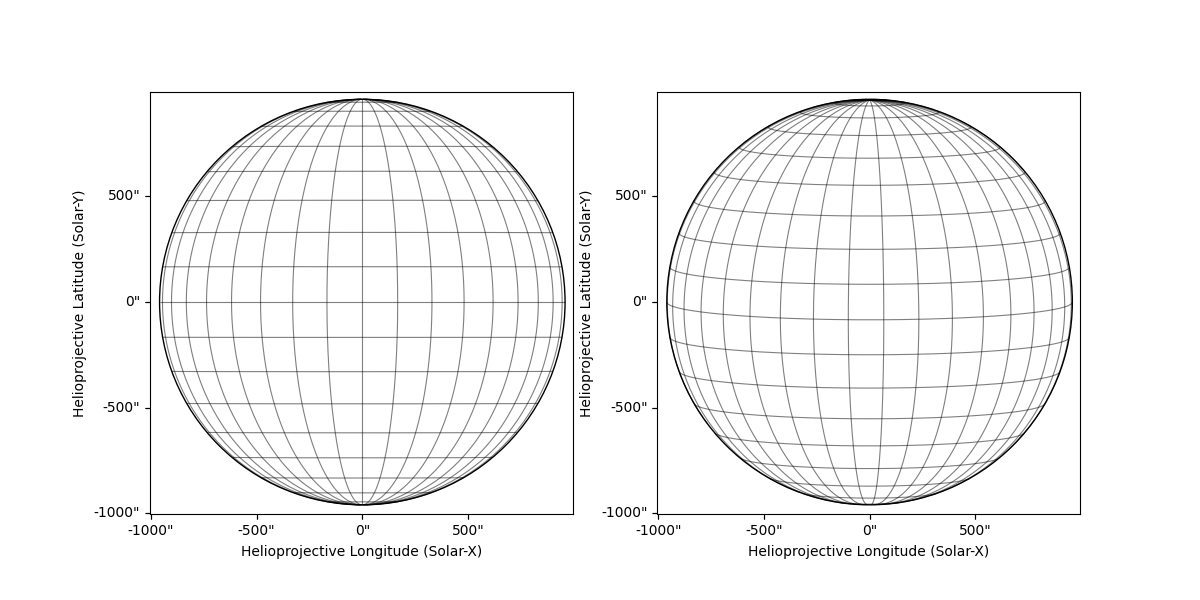

In [9]:
# Define a list of dummy maps
dummy_maps = [dummy_map1, dummy_map2]
num_maps = len(dummy_maps)

fig = plt.figure(figsize=(6 * num_maps, 6))
axs = []
for midx, dummy_map in enumerate(dummy_maps):
    ax = fig.add_subplot(1, num_maps, midx + 1, projection=dummy_map)
    axs.append(ax)
    dummy_map.plot(alpha=0, extent=[-1000, 1000, -1000, 1000], title=False, axes=ax)
    dummy_map.draw_grid(axes=ax, grid_spacing=10 * u.deg, color='k')
    dummy_map.draw_limb(axes=ax, color='k')


## Step 3: Initialize the `CoronalLoopBuilder` with the Solar Images

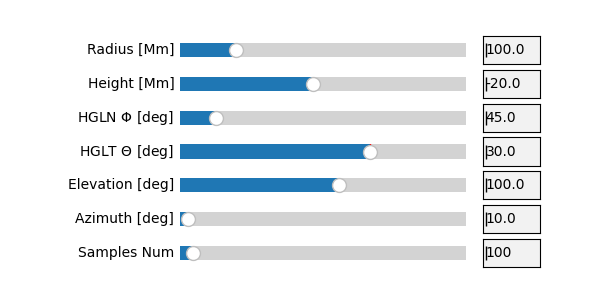

In [10]:
coronal_loop = CoronalLoopBuilder(fig, axs, dummy_maps, 100 * u.Mm, -20 * u.Mm, 30 * u.deg, 45 * u.deg,
                                  100 * u.deg, 10 * u.deg, 100)


## Step 4: Interactively Adjust the Coronal Loop Parameters Using Sliders

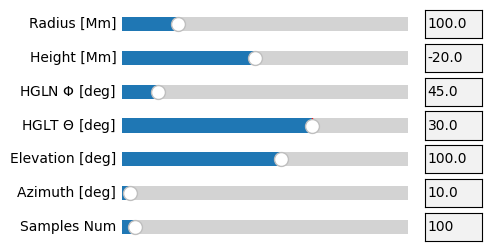

In [5]:
coronal_loop.init_toggle_button()
coronal_loop.toggle_sliders(1)
